# Install and import packages 

In [2]:
%% python -m pip install poreana
%% python -m pip install porems

UsageError: Cell magic `%%` not found.


In [26]:
import poreana as pa
import porems as pms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import ipywidgets as widgets



# Overview 
The data set contains the following systems at a Temperature $T=295 K$:

|Alcohol   |Aromatic|Alkene      |
|:---------|:-------|:-----------|
|Methanol  |Benzene |Cyclopentane|
|Ethanol   |Toluene |Cyclohexane |
|1-Propanol|Pyrole  |Hexane      |
|1-Butanol |Pyridine|Heptane     |




Set strings to the files in the data verse

In [66]:
drop = widgets.Dropdown(
    options=['methanol', 'ethanol', '1-propanol'],
    value="methanol",
    description='Molecule:',
    disabled=False,
)


display(drop)

import ipywidgets as w
from IPython.display import Javascript, display
def run_all(ev):
    if validation == 1: #validation is a var with a previous assignment.
        display(Javascript('IPython.notebook.execute_cell(3)')) # 3 could be the cell Id that i want to execute
    else:
        display(Javascript('IPython.notebook.execute_cell(4)')) # 4 could be the cell Id that i want to execute
button = w.Button(button_style='info',description="Execute Report")
button.on_click(run_all)
display(button)



Dropdown(description='Molecule:', options=('methanol', 'ethanol', '1-propanol'), value='methanol')

Button(button_style='info', description='Execute Report', style=ButtonStyle())

In [62]:
molecule = drop.value


strings def run_all(button):
    get_ipython().run_cell()

button = widgets.Button(description="Create next input")
button.on_click(run_all)
display(button)ule in ["cyclopentane","hexane","heptan"]:
    strings["dens"] = "Pore/{}/pore_amorph_{}_density.h5".format(molecule,molecule)
    strings["bin"] = "Pore/{}/pore_amorph_{}_diffusion_einstein.h5".format(molecule,molecule)
    strings["mc"] = "Pore/{}/pore_amorph_{}_diffusion_smoluchowski.h5".format(molecule,molecule)
    


# Density

(0.0, 2.5)

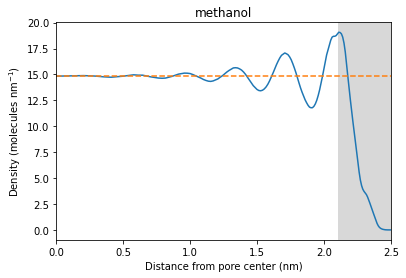

In [63]:
dens = pa.density.bins(strings["dens"], is_print=False)
plt.plot(dens["sample"]["data"]["in_width"][:-1],[den for den in dens["num_dens"]["in"]])
plt.plot(dens["sample"]["data"]["ex_width"][:-1],[dens["mean"]["ex"] for i in dens["num_dens"]["ex"][:-1]], linestyle = "--")
plt.axvspan(xmin=2.1, xmax=2.5, facecolor="grey", alpha=0.3)
plt.ylabel("Density (molecules $\mathrm{nm}^{-1}$)")
plt.xlabel("Distance from pore center (nm)")
plt.title(molecule)
plt.xlim([0,2.5])

# Diffusion

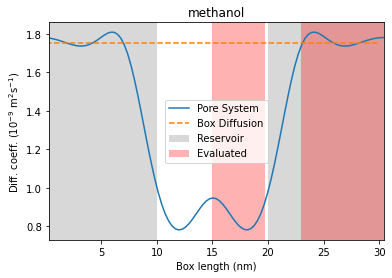

In [67]:
mc_box = pa.diffusion.mc_fit(strings["mc_box"], len_step = [10,20,30,40,50,60], is_plot=False, is_print=False)
mc_pore = pa.diffusion.mc_profile(strings["mc"], len_step = [10,20,30,40,50,60], kwargs={"label": "Pore System"})
sns.lineplot(x=np.linspace(0,30.1,100),y=[mc_box[0] for i in range(100)], linestyle="--", label="Box Diffusion")
plt.title(molecule)

# Plot area
plt.axvspan(xmin=0, xmax=10, facecolor="grey", alpha=0.3, label = "Reservoir")
plt.axvspan(xmin=20, xmax=31, facecolor="grey", alpha=0.3)
plt.axvspan(xmin=15, xmax=19.7, facecolor="red", alpha=0.3, label = "Evaluated")
plt.axvspan(xmin=23, xmax=31, facecolor="red", alpha=0.3)
plt.legend()